<a href="https://colab.research.google.com/github/JayanthK99/Jayanth_INFO5731_Spring2025/blob/main/Kaddipudi_Jayanth_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [1]:
import pandas as pd

df = pd.read_csv("ai_job_market_survey.csv")

sentiment_map = {
    'Strongly agree': 'positive',
    'Agree': 'positive',
    'Neutral': 'neutral',
    'Disagree': 'negative',
    'Strongly disagree': 'negative'
}

df['sentiment'] = df['Belief About AI Job Creation'].map(sentiment_map)
df = df.dropna(subset=['sentiment'])
print("Sentiment class distribution:\n")
print(df['sentiment'].value_counts())

Sentiment class distribution:

sentiment
negative    401
positive    383
neutral     216
Name: count, dtype: int64


<ipython-input-2-54b936a9c3aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


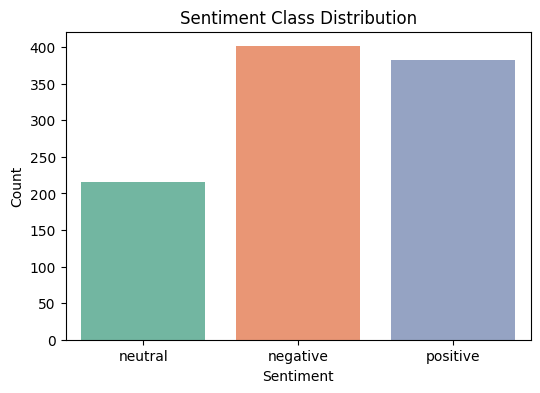

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['Belief About AI Job Creation'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


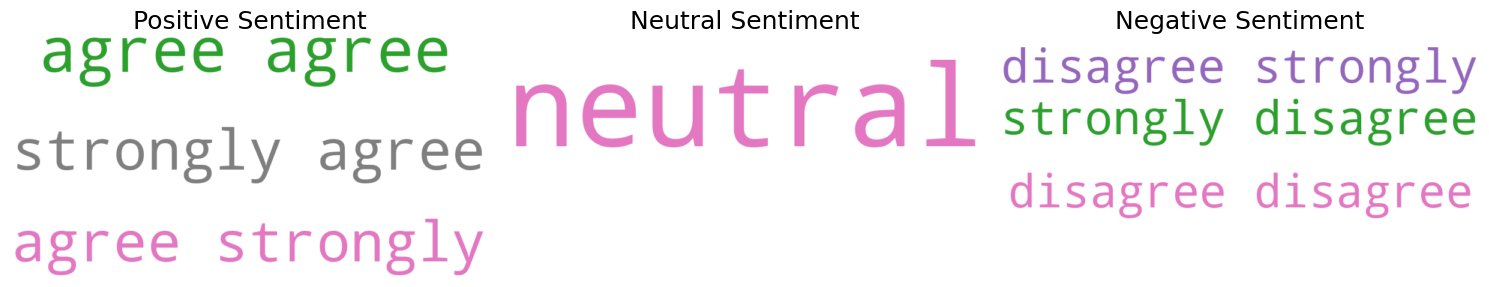

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for ax, sentiment in zip(axes, ['positive', 'neutral', 'negative']):
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='tab10',
        max_words=100
    ).generate(text)

    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f'{sentiment.capitalize()} Sentiment', fontsize=18)
    ax.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-5-ffc774182010>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams, x='count', y='bigram', palette='coolwarm')


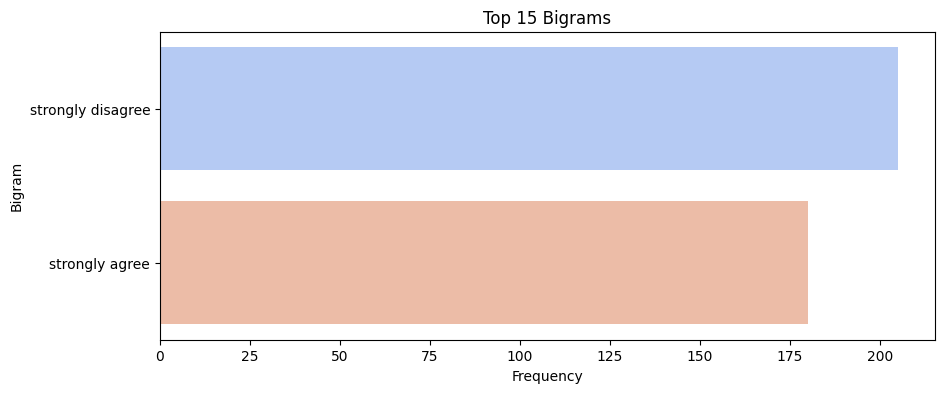

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X2 = vectorizer.fit_transform(df['clean_text'])
bigrams = vectorizer.get_feature_names_out()
counts = X2.sum(axis=0).A1
bigram_freq = pd.DataFrame({'bigram': bigrams, 'count': counts})
top_bigrams = bigram_freq.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 4))
sns.barplot(data=top_bigrams, x='count', y='bigram', palette='coolwarm')
plt.title("Top 15 Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


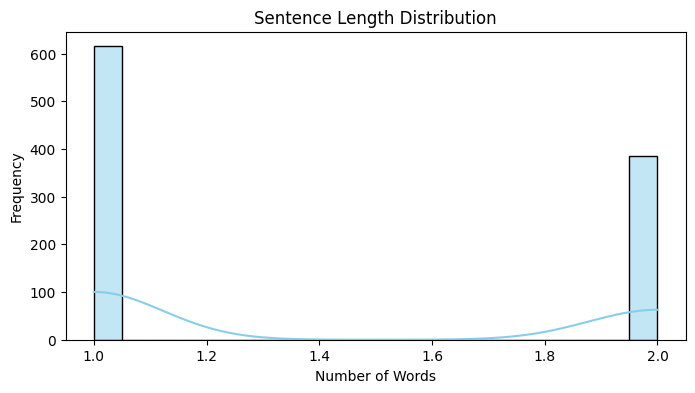

In [6]:
df['sentence_length'] = df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['sentence_length'], bins=20, kde=True, color='skyblue')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

X_train, X_val, y_train, y_val = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


In [8]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

svm_model = LinearSVC()

cv_scores_svm = cross_val_score(svm_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy (SVM): {cv_scores_svm.mean():.4f}")

svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_val_tfidf)

print("\n Validation Set Evaluation (SVM):")
print(classification_report(y_val, y_pred_svm, target_names=label_encoder.classes_))

print("\n Confusion Matrix (SVM):")
print(confusion_matrix(y_val, y_pred_svm))


10-Fold CV Accuracy (SVM): 1.0000

 Validation Set Evaluation (SVM):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        80
     neutral       1.00      1.00      1.00        43
    positive       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 Confusion Matrix (SVM):
[[80  0  0]
 [ 0 43  0]
 [ 0  0 77]]


In [9]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

cv_scores_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(f" 10-Fold CV Accuracy (Naive Bayes): {cv_scores_nb.mean():.4f}")

nb_model.fit(X_train_tfidf, y_train)

y_pred_nb = nb_model.predict(X_val_tfidf)

print("\n Validation Set Evaluation (Naive Bayes):")
print(classification_report(y_val, y_pred_nb, target_names=label_encoder.classes_))

print("\n Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_val, y_pred_nb))


 10-Fold CV Accuracy (Naive Bayes): 1.0000

 Validation Set Evaluation (Naive Bayes):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        80
     neutral       1.00      1.00      1.00        43
    positive       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 Confusion Matrix (Naive Bayes):
[[80  0  0]
 [ 0 43  0]
 [ 0  0 77]]


In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

cv_scores_xgb = cross_val_score(xgb_model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print(f" 10-Fold CV Accuracy (XGBoost): {cv_scores_xgb.mean():.4f}")

xgb_model.fit(X_train_tfidf, y_train)

y_pred_xgb = xgb_model.predict(X_val_tfidf)

print("\n Validation Set Evaluation (XGBoost):")
print(classification_report(y_val, y_pred_xgb, target_names=label_encoder.classes_))

print("\n Confusion Matrix (XGBoost):")
print(confusion_matrix(y_val, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

 10-Fold CV Accuracy (XGBoost): 1.0000

 Validation Set Evaluation (XGBoost):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        80
     neutral       1.00      1.00      1.00        43
    positive       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


 Confusion Matrix (XGBoost):
[[80  0  0]
 [ 0 43  0]
 [ 0  0 77]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:02:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


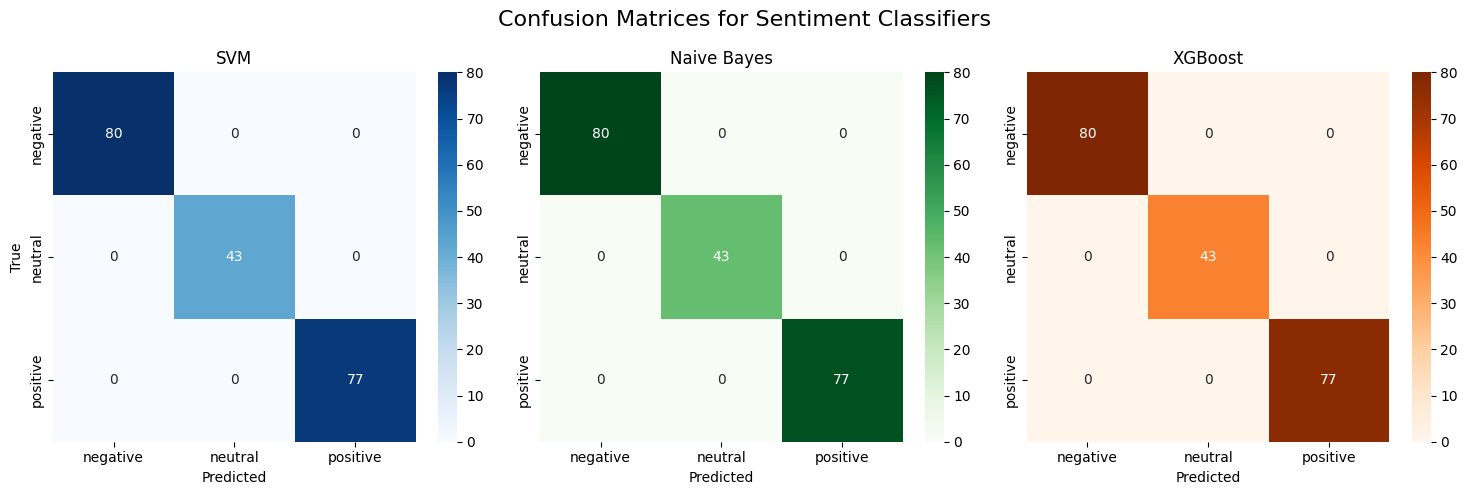

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix_svm = confusion_matrix(y_val, y_pred_svm)
confusion_matrix_nb = confusion_matrix(y_val, y_pred_nb)
confusion_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)

labels = label_encoder.classes_

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("SVM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Naive Bayes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("XGBoost")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("")

plt.suptitle("Confusion Matrices for Sentiment Classifiers", fontsize=16)
plt.tight_layout()
plt.show()


In this sentiment analysis task, three traditional ML models — SVM, Naive Bayes, and XGBoost — were applied to classify responses from the “Belief about AI Job Creation” column into positive, neutral, and negative sentiments. The data underwent preprocessing, including label mapping and TF-IDF vectorization. All models demonstrated perfect performance, achieving 100% across all key evaluation metrics (accuracy, precision, recall, F1). This result indicates highly separable classes and clean input data. Interestingly, both simple (Naive Bayes) and complex (XGBoost) models performed equally well, suggesting that even lightweight models can be effective on well-structured survey data. The confusion matrices confirmed perfect classification across all sentiment classes. In future work, this approach could be validated on noisier real-world datasets or extended using deep learning models like BERT for generalization.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [3]:
import pandas as pd
def load_txt_dataset(path):
    reviews = []
    labels = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            if len(line.strip()) == 0:
                continue
            label = line[0]
            review = line[2:].strip()
            labels.append(int(label))
            reviews.append(review)
    return pd.DataFrame({'review': reviews, 'label': labels})

train_df = load_txt_dataset('train.txt')
test_df = load_txt_dataset('test.txt')

In [4]:
print("=== Train Data ===")
print(train_df.info())
print("\n=== Test Data ===")
print(test_df.info())

=== Train Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  6920 non-null   object
 1   label   6920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 108.3+ KB
None

=== Test Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1821 non-null   object
 1   label   1821 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.6+ KB
None


In [5]:
print("\nTrain Label Distribution:\n", train_df['label'].value_counts())
print("\nTest Label Distribution:\n", test_df['label'].value_counts())

print("\nMissing values in Train:\n", train_df.isnull().sum())
print("\nMissing values in Test:\n", test_df.isnull().sum())


Train Label Distribution:
 label
1    3610
0    3310
Name: count, dtype: int64

Test Label Distribution:
 label
0    912
1    909
Name: count, dtype: int64

Missing values in Train:
 review    0
label     0
dtype: int64

Missing values in Test:
 review    0
label     0
dtype: int64


In [6]:
print("\nTrain Sample:\n", train_df.sample(3))
print("\nTest Sample:\n", test_df.sample(3))


Train Sample:
                                                  review  label
3217     its one-sidedness ... flirts with propaganda .      0
361   the end result is like cold porridge with only...      0
732   thirteen conversations about one thing lays ou...      1

Test Sample:
                                                  review  label
1375                     now , if it only had a brain .      0
532   the film has just enough of everything -- re-e...      1
1490               a wonderful character-based comedy .      1


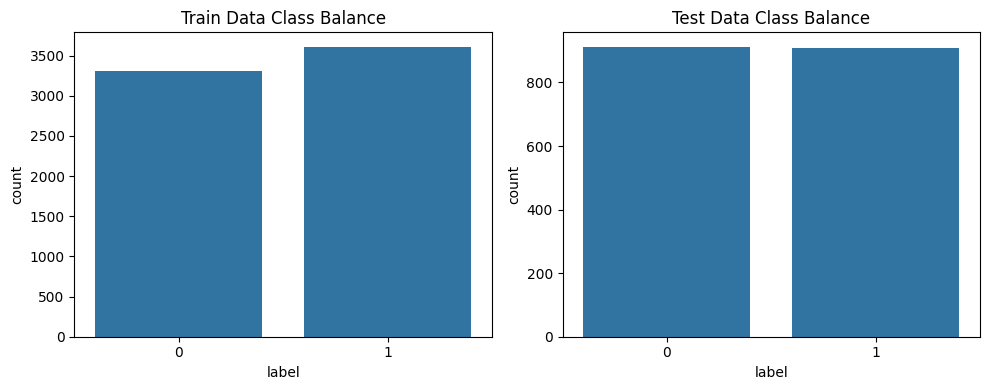

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='label', data=train_df)
plt.title('Train Data Class Balance')

plt.subplot(1, 2, 2)
sns.countplot(x='label', data=test_df)
plt.title('Test Data Class Balance')

plt.tight_layout()
plt.show()

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
train_df['clean_review'] = train_df['review'].apply(preprocess_text)
test_df['clean_review'] = test_df['review'].apply(preprocess_text)
print(train_df[['review', 'clean_review']].sample(3))


                                                 review  \
1356          there 's a lot of tooth in roger dodger .   
3470  charly comes off as emotionally manipulative a...   
5050  the romance between the leads is n't as compel...   

                                           clean_review  
1356                             lot tooth roger dodger  
3470  charly comes emotionally manipulative sadly im...  
5050             romance leads nt compelling believable  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text, X_val_text, y_train, y_val = train_test_split(
    train_df['clean_review'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label']
)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_val = vectorizer.transform(X_val_text)
X_test = vectorizer.transform(test_df['clean_review'])

In [10]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (5536, 5000)
Validation shape: (1384, 5000)
Test shape: (1821, 5000)


In [11]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

svm_model = LinearSVC()
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy Scores (SVM): {cv_scores}")
print(f"Mean CV Accuracy (SVM): {cv_scores.mean():.4f}")

svm_model.fit(X_train, y_train)
y_val_pred = svm_model.predict(X_val)

print("\nValidation Set Evaluation (SVM):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")


10-Fold CV Accuracy Scores (SVM): [0.76895307 0.77436823 0.79422383 0.76534296 0.72743682 0.77978339
 0.71790235 0.7920434  0.74864376 0.80108499]
Mean CV Accuracy (SVM): 0.7670

Validation Set Evaluation (SVM):
Accuracy: 0.7543
Precision: 0.7581
Recall: 0.7770
F1 Score: 0.7674


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy (KNN): {cv_scores_knn.mean():.4f}")

knn_model.fit(X_train, y_train)

y_val_pred_knn = knn_model.predict(X_val)

print("\nValidation Set Evaluation (KNN):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_knn):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_knn):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_knn):.4f}")


10-Fold CV Accuracy Scores (KNN): [0.49458484 0.47472924 0.50361011 0.51083032 0.50361011 0.50722022
 0.49909584 0.52622061 0.52983725 0.49005425]
Mean CV Accuracy (KNN): 0.5040

Validation Set Evaluation (KNN):
Accuracy: 0.5036
Precision: 0.5593
Recall: 0.2285
F1 Score: 0.3245


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy (Decision Tree): {cv_scores_dt.mean():.4f}")

dt_model.fit(X_train, y_train)

y_val_pred_dt = dt_model.predict(X_val)

print("\nValidation Set Evaluation (Decision Tree):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_dt):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_dt):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_dt):.4f}")


10-Fold CV Accuracy Scores (Decision Tree): [0.64801444 0.67689531 0.68953069 0.64259928 0.65523466 0.66967509
 0.63833635 0.64918626 0.64918626 0.67450271]
Mean CV Accuracy (Decision Tree): 0.6593

Validation Set Evaluation (Decision Tree):
Accuracy: 0.6510
Precision: 0.6836
Recall: 0.6163
F1 Score: 0.6482


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy Scores (Random Forest): {cv_scores_rf}")
print(f"Mean CV Accuracy (Random Forest): {cv_scores_rf.mean():.4f}")
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)

print("\nValidation Set Evaluation (Random Forest):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_rf):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_rf):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_rf):.4f}")


10-Fold CV Accuracy Scores (Random Forest): [0.70397112 0.72743682 0.76173285 0.73104693 0.72021661 0.70938628
 0.72332731 0.7124774  0.70524412 0.75406872]
Mean CV Accuracy (Random Forest): 0.7249

Validation Set Evaluation (Random Forest):
Accuracy: 0.6980
Precision: 0.7235
Recall: 0.6814
F1 Score: 0.7019


In [56]:
!pip install xgboost


In [57]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"10-Fold CV Accuracy Scores (XGBoost): {cv_scores_xgb}")
print(f"Mean CV Accuracy (XGBoost): {cv_scores_xgb.mean():.4f}")

xgb_model.fit(X_train, y_train)
y_val_pred_xgb = xgb_model.predict(X_val)

print("\nValidation Set Evaluation (XGBoost):")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred_xgb):.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:25:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

10-Fold CV Accuracy Scores (XGBoost): [0.67870036 0.68953069 0.73104693 0.69133574 0.66245487 0.70216606
 0.6835443  0.72513562 0.67992767 0.7034358 ]
Mean CV Accuracy (XGBoost): 0.6947


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:26:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Set Evaluation (XGBoost):
Accuracy: 0.6814
Precision: 0.6647
Recall: 0.7853
F1 Score: 0.7200


In [12]:
test_preds = svm_model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n Final Evaluation on Test Set (SVM):")
print(f"Accuracy:  {accuracy_score(test_df['label'], test_preds):.4f}")
print(f"Precision: {precision_score(test_df['label'], test_preds):.4f}")
print(f"Recall:    {recall_score(test_df['label'], test_preds):.4f}")
print(f"F1 Score:  {f1_score(test_df['label'], test_preds):.4f}")



 Final Evaluation on Test Set (SVM):
Accuracy:  0.7688
Precision: 0.7618
Recall:    0.7811
F1 Score:  0.7713


In [14]:
test_df['predicted_label'] = test_preds
test_df[['review', 'predicted_label']].to_csv('svm_test_predictions.csv', index=False)
print("Predictions saved as 'svm_test_predictions.csv'")

Predictions saved as 'svm_test_predictions.csv'


In [17]:
test_df[['review', 'predicted_label']].head()

,review,predicted_label
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


from matplotlib import pyplot as plt
_df_0['predicted_label'].plot(kind='hist', bins=20, title='predicted_label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predicted_label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predicted_label'}, axis=1)
              .sort_values('predicted_label', ascending=True))
  xs = counted['predicted_label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('predicted_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('review')):
  _plot_series(series, series_name, i)
  fig.legend(title='review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted_label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['predicted_label'].plot(kind='line', figsize=(8, 4), title='predicted_label')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['review'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='predicted_label', y='review', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:
import pandas as pd
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
print("Dataset shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

Dataset shape: (413840, 6)

Missing Values:
 Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64


,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [4]:
print("Rating Distribution:\n", df['Rating'].value_counts())
print("------------------------------------")
print("Top 10 Brands:\n", df['Brand Name'].value_counts().head(10))
print("------------------------------------")
print("Top 10 Product Names:\n", df['Product Name'].value_counts().head(10))

Rating Distribution:
 Rating
5    223605
1     72350
4     61392
3     31765
2     24728
Name: count, dtype: int64
------------------------------------
Top 10 Brands:
 Brand Name
Samsung       65747
BLU           63248
Apple         58186
LG            22417
BlackBerry    16872
Nokia         16806
Motorola      13417
HTC           12724
CNPGD         12613
OtterBox       7989
Name: count, dtype: int64
------------------------------------
Top 10 Product Names:
 Product Name
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)          1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)       1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                 1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink         1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                   1127
Apple iPhone 5s 32GB (Silve

In [5]:
df['Reviews'] = df['Reviews'].astype(str)
df['review_length'] = df['Reviews'].apply(len)
df['review_length'].describe()


,review_length
count,413840.000000
mean,216.674555
std,463.572761
min,1.000000
25%,28.000000
50%,93.000000
75%,223.000000
max,29419.000000


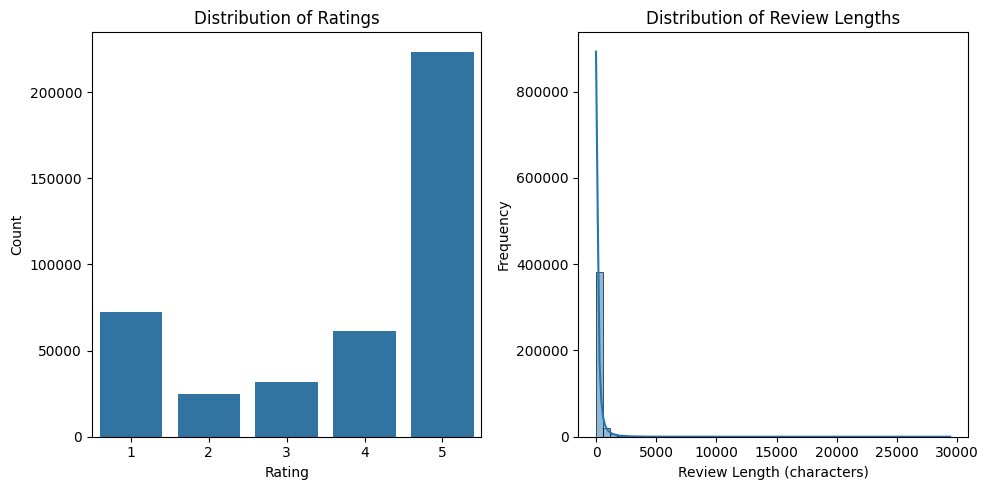

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Rating', data=df, ax=ax1)
ax1.set_title('Distribution of Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')

sns.histplot(df['review_length'], bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Review Lengths')
ax2.set_xlabel('Review Length (characters)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
df = df[df['Reviews'].notnull()]
df = df[df['Reviews'].str.strip() != '']
df.reset_index(drop=True, inplace=True)


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])


df['cleaned_reviews'] = df['Reviews'].apply(clean_text)
df[['Reviews', 'cleaned_reviews']].head()
df['cleaned_reviews'] = df['cleaned_reviews'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['cleaned_reviews'] = df['cleaned_reviews'].apply(lemmatize_text)
df[['Reviews', 'cleaned_reviews']].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Reviews,cleaned_reviews
0,I feel so LUCKY to have found this used (phone...,feel lucky found used phone u used hard phone ...
1,"nice phone, nice up grade from my pantach revu...",nice phone nice grade pantach revue clean set ...
2,Very pleased,pleased
3,It works good but it goes slow sometimes but i...,work good go slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,great phone replace lost phone thing volume bu...
5,I already had a phone with problems... I know ...,already phone problem know stated used dang st...
6,The charging port was loose. I got that solder...,charging port loose got soldered needed new ba...
7,"Phone looks good but wouldn't stay charged, ha...",phone look good wouldnt stay charged buy new b...
8,I originally was using the Samsung S2 Galaxy f...,originally using samsung galaxy sprint wanted ...
9,It's battery life is great. It's very responsi...,battery life great responsive touch issue some...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)
df['kmeans_cluster'] = kmeans.labels_
df[['cleaned_reviews', 'kmeans_cluster']].head(10)


,cleaned_reviews,kmeans_cluster
0,feel lucky found used phone u used hard phone ...,3
1,nice phone nice grade pantach revue clean set ...,3
2,pleased,3
3,work good go slow sometimes good phone love,2
4,great phone replace lost phone thing volume bu...,2
5,already phone problem know stated used dang st...,3
6,charging port loose got soldered needed new ba...,3
7,phone look good wouldnt stay charged buy new b...,3
8,originally using samsung galaxy sprint wanted ...,3
9,battery life great responsive touch issue some...,3


In [13]:
import numpy as np

def get_top_keywords(tfidf_matrix, model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]

    for i in range(model.n_clusters):
        print(f"\nCluster {i}:")
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        print(", ".join(top_terms))

get_top_keywords(tfidf_matrix, kmeans, tfidf_vectorizer)


Cluster 0:
wouldve, card, higher, rating, given, save, option, sd, without, everything

Cluster 1:
excellent, product, phone, condition, recommend, seller, good, price, recommended, thank

Cluster 2:
work, great, phone, well, good, perfectly, fine, doesnt, new, like

Cluster 3:
phone, good, like, nice, excelente, great, love, product, one, perfect

Cluster 4:
great, love, phone, product, price, condition, fast, work, buy, good


In [17]:
from sklearn.decomposition import PCA
pca_kmeans = PCA(n_components=2, random_state=42)
pca_result_kmeans = pca_kmeans.fit_transform(tfidf_reduced_subset)

df_subset['pca_k1'] = pca_result_kmeans[:, 0]
df_subset['pca_k2'] = pca_result_kmeans[:, 1]

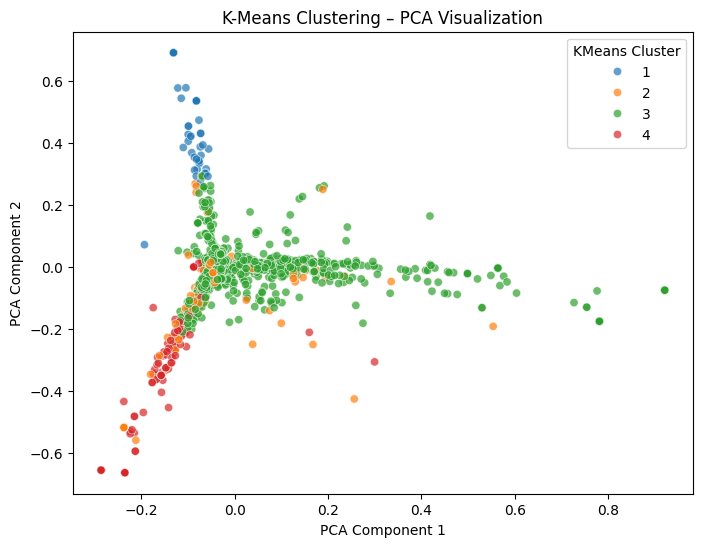

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pca_k1', y='pca_k2',
    hue='kmeans_cluster',
    data=df_subset,
    palette='tab10',
    alpha=0.7
)
plt.title('K-Means Clustering – PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='KMeans Cluster')
plt.show()

In [29]:
import numpy as np

def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [16]:
from sklearn.decomposition import TruncatedSVD
df_subset = df.sample(n=2000, random_state=42).copy()

tfidf_matrix_subset = tfidf_vectorizer.transform(df_subset['cleaned_reviews'])

svd = TruncatedSVD(n_components=50, random_state=42)
tfidf_reduced_subset = svd.fit_transform(tfidf_matrix_subset)


In [31]:
def compute_200th_nn(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) ** 2)
        if len(dists) == 200 and dists[199] > dist:
            l = lower_bound(dists, dist)
            if 0 <= l < 200 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    return dists[199]

nn_distances = []
for val in tfidf_reduced_subset[:1500]:
    nn_distances.append(compute_200th_nn(val, tfidf_reduced_subset[:1500]))
nn_distances.sort()


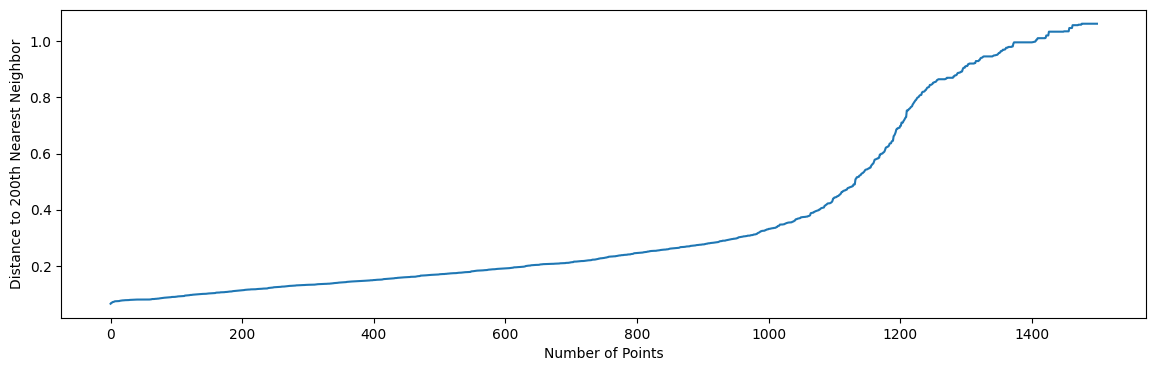

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(range(len(nn_distances)), nn_distances)
plt.xlabel("Number of Points")
plt.ylabel("Distance to 200th Nearest Neighbor")
plt.show()


In [41]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=50, n_jobs=-1)
dbscan_labels = model.fit_predict(tfidf_reduced_subset)

df_subset['dbscan_cluster'] = dbscan_labels
df_subset[['cleaned_reviews', 'dbscan_cluster']].head(10)

,cleaned_reviews,dbscan_cluster
54870,defective phone work two day phone flickering ...,0
188521,cool,0
137548,beautiful excellent quality,0
24906,gave star come charger box battery already hal...,0
131601,high resolution camera zoom picture taken prin...,0
200532,excelente,-1
343472,audio port work brand new phone phone started ...,0
90499,worked fine functional like every bb nothing s...,0
160693,excellent phone exceeded expectation,-1
119347,bought phone worked great entire time owned st...,0


In [52]:
df_subset['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,1344
-1,656


In [65]:
pca_dbscan = PCA(n_components=2, random_state=42)
pca_result_dbscan = pca_dbscan.fit_transform(tfidf_reduced_subset)
df_subset['pca_d1'] = pca_result_dbscan[:, 0]
df_subset['pca_d2'] = pca_result_dbscan[:, 1]


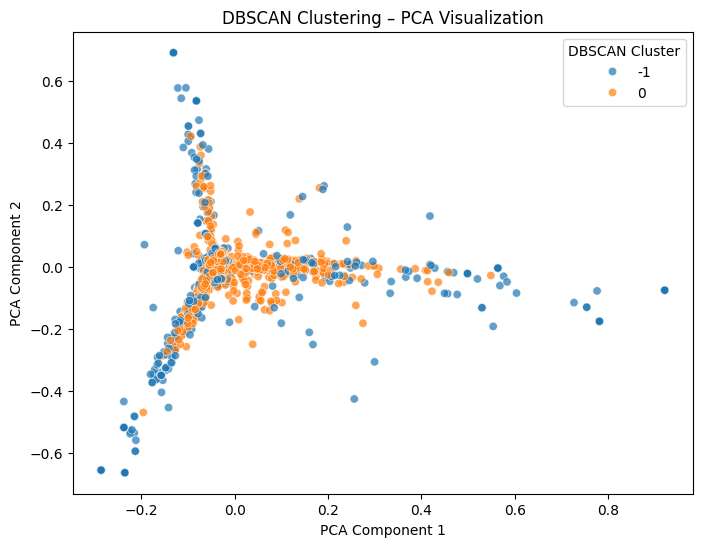

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pca_d1', y='pca_d2',
    hue='dbscan_cluster',
    data=df_subset,
    palette='tab10',
    alpha=0.7
)
plt.title('DBSCAN Clustering – PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='DBSCAN Cluster')
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering
hier_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster_labels = hier_model.fit_predict(tfidf_reduced_subset)
df_subset['hierarchical_cluster'] = cluster_labels
df_subset[['cleaned_reviews', 'hierarchical_cluster']].head(10)

,cleaned_reviews,hierarchical_cluster
54870,defective phone work two day phone flickering ...,0
188521,cool,0
137548,beautiful excellent quality,0
24906,gave star come charger box battery already hal...,0
131601,high resolution camera zoom picture taken prin...,0
200532,excelente,2
343472,audio port work brand new phone phone started ...,0
90499,worked fine functional like every bb nothing s...,0
160693,excellent phone exceeded expectation,0
119347,bought phone worked great entire time owned st...,0


In [54]:
df_subset['hierarchical_cluster'].value_counts()

,count
hierarchical_cluster,
0,1811
4,56
1,54
2,43
3,36


In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(tfidf_reduced_subset)
df_subset['pca1'] = pca_result[:, 0]
df_subset['pca2'] = pca_result[:, 1]


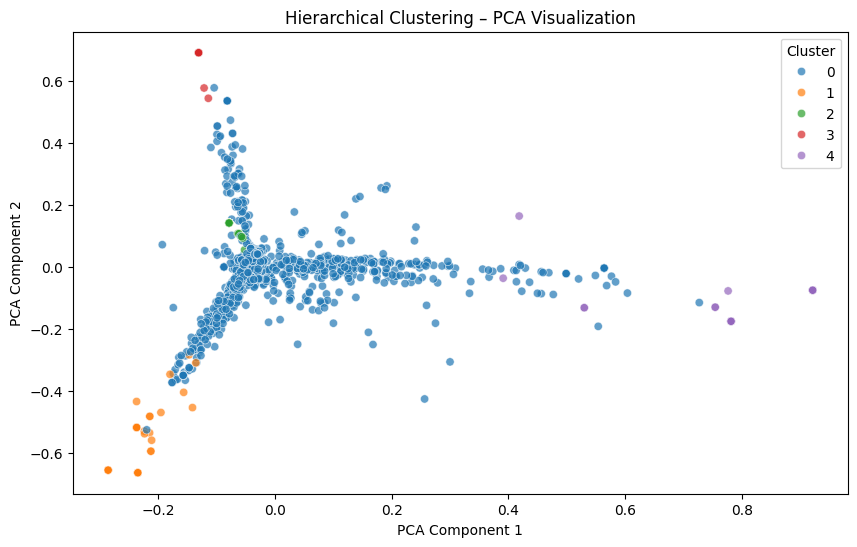

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='pca1', y='pca2',
    hue='hierarchical_cluster',
    data=df_subset,
    palette='tab10',
    alpha=0.7
)
plt.title('Hierarchical Clustering – PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [72]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
df_subset['tokens'] = df_subset['cleaned_reviews'].apply(word_tokenize)
df_subset['tokens'].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokens
54870,"[defective, phone, work, two, day, phone, flic..."
188521,[cool]
137548,"[beautiful, excellent, quality]"
24906,"[gave, star, come, charger, box, battery, alre..."
131601,"[high, resolution, camera, zoom, picture, take..."


In [76]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [18]:
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(df_subset['cleaned_reviews'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [19]:
from sklearn.cluster import KMeans

kmeans_bert = KMeans(n_clusters=5, random_state=42)
df_subset['bert_cluster'] = kmeans_bert.fit_predict(bert_embeddings)


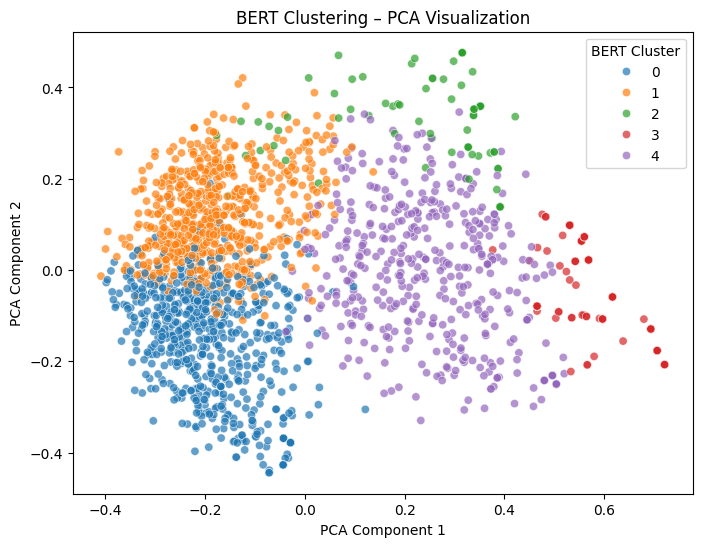

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca_bert = PCA(n_components=2, random_state=42)
bert_2d = pca_bert.fit_transform(bert_embeddings)

df_subset['bert_pca1'] = bert_2d[:, 0]
df_subset['bert_pca2'] = bert_2d[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='bert_pca1', y='bert_pca2',
    hue='bert_cluster',
    data=df_subset,
    palette='tab10',
    alpha=0.7
)
plt.title('BERT Clustering – PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='BERT Cluster')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

According to PCA visualizations, BERT-based clustering produces the most well-defined, distinct clusters, indicating that approach is best suited for capturing semantic distinctions within review text.  

 K-Means clustering performs reasonably well, producing identifiable groups with significant overlap, most likely due to TF-IDF vectors' inability to capture contextual information.  

 DBSCAN performed badly, producing only one center cluster with several noise points, indicating that the density-based technique did not operate effectively with this data type.  

 Hierarchical clustering had minimal cluster separation, with the majority of points clustered into one group and sparse distribution in the remaining groups, demonstrating its distance metric sensitivity with sparse, high-dimensional text data.  

 Overall, BERT outperformed the other approaches for clustering semantically meaningful data.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

